In [82]:
#import libraries
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix

In [3]:
f = open('data/processed/data2011.pkl', 'rb')

In [4]:
data2011=pickle.load(f)

In [5]:
f.close()

In [6]:
#this is the dataframe derived from the Markov chain based on baseball
data2011

trans3,0:0,0:0X,0:1,0:2,0:3,0X:0X,0X:0XX,0X:1X,0X:2X,0X:3X,...,3X:3X,3X:3XX,3XX:0XX,3XX:0XXX,3XX:13XX,3XX:1XX,3XX:1XXX,3XX:2XX,3XX:3XX,3XX:3XXX
home_team,,,,,,,,,,,,,,,,,,,,,
ANA,0.022427,0.693931,0.239446,0.039578,0.004617,0.026786,0.683929,0.238393,0.046429,0.004464,...,0.000000,0.293103,0.009174,0.000000,0.146789,0.100917,0.000000,0.064220,0.018349,0.660550
ARI,0.028648,0.674217,0.237841,0.053298,0.005996,0.033606,0.684832,0.225250,0.052679,0.003633,...,0.013158,0.328947,0.080808,0.000000,0.171717,0.161616,0.000000,0.020202,0.010101,0.555556
ATL,0.030245,0.679537,0.230373,0.052767,0.007079,0.022381,0.686661,0.247090,0.039391,0.004476,...,0.021739,0.239130,0.000000,0.000000,0.133333,0.200000,0.000000,0.016667,0.000000,0.650000
BAL,0.025243,0.684790,0.234951,0.053074,0.001942,0.033943,0.691036,0.233246,0.040035,0.001741,...,0.015625,0.281250,0.066667,0.013333,0.186667,0.093333,0.000000,0.000000,0.000000,0.640000
BOS,0.033987,0.657516,0.241176,0.058824,0.008497,0.022346,0.644320,0.265363,0.062384,0.005587,...,0.000000,0.305556,0.025424,0.008475,0.177966,0.127119,0.000000,0.101695,0.000000,0.559322
CHA,0.023825,0.689610,0.234282,0.047651,0.004633,0.023508,0.687161,0.248644,0.038879,0.001808,...,0.028986,0.318841,0.033708,0.000000,0.179775,0.146067,0.000000,0.033708,0.011236,0.595506
CHN,0.034098,0.660984,0.249180,0.049836,0.005902,0.020716,0.682674,0.242938,0.045198,0.008475,...,0.014493,0.449275,0.029412,0.000000,0.186275,0.088235,0.000000,0.049020,0.000000,0.647059
CIN,0.042263,0.682705,0.230169,0.040312,0.004551,0.037986,0.664311,0.250883,0.042403,0.004417,...,0.000000,0.255319,0.029851,0.000000,0.134328,0.134328,0.000000,0.014925,0.000000,0.686567
CLE,0.027650,0.678736,0.235681,0.053983,0.003950,0.027125,0.697107,0.233273,0.038879,0.003617,...,0.017241,0.310345,0.042553,0.000000,0.202128,0.063830,0.000000,0.063830,0.000000,0.627660


In [7]:
data2011.index

Index(['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CHA', 'CHN', 'CIN', 'CLE', 'COL',
       'DET', 'FLO', 'HOU', 'KCA', 'LAN', 'MIL', 'MIN', 'NYA', 'NYN', 'OAK',
       'PHI', 'PIT', 'SDN', 'SEA', 'SFN', 'SLN', 'TBA', 'TEX', 'TOR', 'WAS'],
      dtype='object', name='home_team')

In [8]:
#assign teams based on being in top ten or not, 0=non top 10, 1=top 10

top_ten = ['TEX', 'NYA', 'BOS', 'COL', 'DET', 'ARI', 'MIL', 'CIN', 'TOR', 'KCA']
answers = []

for team in data2011.index:
    if team in top_ten:
        answers.append(1)
    else:
        answers.append(0)

#create new column of results
data2011['top_ten'] = answers

In [9]:
data2011['top_ten'].head()

home_team
ANA    0
ARI    1
ATL    0
BAL    0
BOS    1
Name: top_ten, dtype: int64

## Support Vector Machine Classification

In [83]:
X_sv = data2011.drop('top_ten', axis=1)  
y_sv = data2011['top_ten'] 
X_sv_train, X_sv_test, y_sv_train, y_sv_test = train_test_split(X_sv, y_sv, test_size=0.20) 

In [84]:
print(X_sv_train.shape)
print(y_sv_train.shape)
print(X_sv_test.shape)
print(y_sv_test.shape)

(24, 313)
(24,)
(6, 313)
(6,)


In [90]:
#using SVC linear parameter
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_sv_train, y_sv_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [91]:
y_sv_pred = svclassifier.predict(X_sv_test)

In [92]:
print(confusion_matrix(y_sv_test, y_sv_pred))  

[[4 0]
 [2 0]]


In [93]:
print(classification_report(y_sv_test, y_sv_pred)) 

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2

   micro avg       0.67      0.67      0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [94]:
print(f"The accuracy score is {accuracy_score(y_sv_test, y_sv_pred)}")

The accuracy score is 0.6666666666666666


## KNN classifier

In [63]:
X_knn = data2011.drop('top_ten', axis=1)  
y_knn = data2011['top_ten'] 

In [64]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, random_state=1)

In [65]:
knn = KNeighborsClassifier(n_neighbors=3)

In [66]:
knn.fit(X_knn_train, y_knn_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [67]:
y_knn_pred = knn.predict(X_knn_test)

In [68]:
# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_knn_test, y_knn_pred)))
print('F1: ' + str(metrics.f1_score(y_knn_test, y_knn_pred)))

Accuracy:0.75
F1: 0.5


In [69]:
print(classification_report(y_knn_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.50      0.50      0.50         2

   micro avg       0.75      0.75      0.75         8
   macro avg       0.67      0.67      0.67         8
weighted avg       0.75      0.75      0.75         8



In [71]:
#F1 score not optimal, going to find optimal k
k_range = list(range(1, 10))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_knn_train, y_knn_train)
    y_knn_predict = knn.predict(X_knn_test)
    score = metrics.f1_score(y_knn_test, y_knn_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.8589743589743589, 0.6428571428571428, 0.75, 0.8589743589743589, 1.0, 0.8589743589743589, 0.5333333333333333, 0.5769230769230769, 0.5333333333333333]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


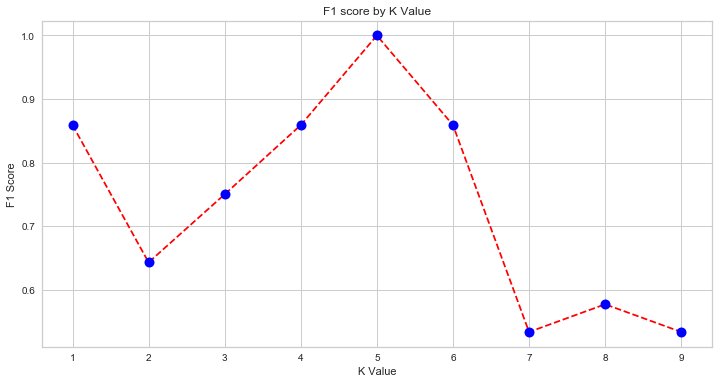

In [72]:
#graph of fl score vs knn
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

## Decision Tree Classifier

In [74]:
clf_DT = DecisionTreeClassifier()

In [75]:
X_dt = data2011.drop('top_ten', axis=1)  
y_dt = data2011['top_ten'] 

In [79]:
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt)

In [80]:
clf_DT.fit(X_dt_train, y_dt_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
y_hat = clf_DT.predict(X_dt_test)

acc = accuracy_score(y_dt_test, y_hat)
print(f"Accuracy Score is {acc}")

Accuracy Score is 0.625


## Random Forest Classifier

In [97]:
clf = RandomForestClassifier(random_state=12)

In [98]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [100]:
X_rf = data2011.drop('top_ten', axis=1)  
y_rf = data2011['top_ten'] 

In [101]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.20, random_state=23)

In [102]:
clf.fit(X_rf_train, y_rf_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [104]:
clf_pred = clf.predict(X_rf_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_rf_test, clf_pred))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_rf_test, clf_pred))

Test Accuracy score:  0.5
Test F1 score:  0.0


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
